### Exercise Sheet 2 by Alvaro Garmendia and Benedict Schuster

### Exercise 1

In the following cell the running time of the broadcast operation has been plotted. The number os processors used is 4. A clear O(n), with n being the size of the message is seen, the spikes are easily explained by the fact that this machine has firefox and other apps open while running the experiment. 

This is consistent with the the expected running time of ${O}(T_{start} + n* T_{byte} $). The methodology employed by the broadcast is just recieving the message and forwarding it to the next processor.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

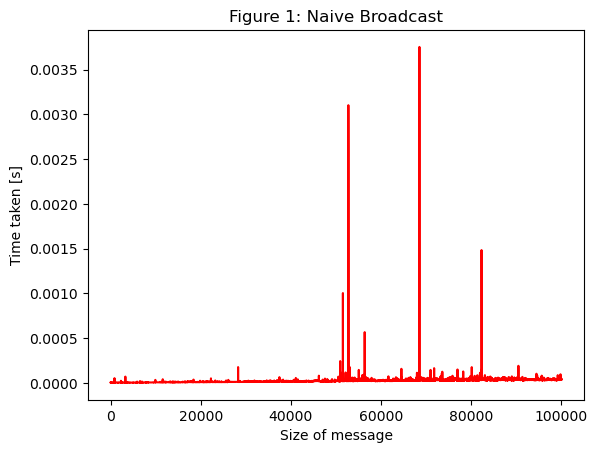

In [6]:
# Path to the CSV file
csv_file = 'broadcast_times.csv'

# Load the CSV file using numpy
data = np.loadtxt(csv_file, delimiter=',', skiprows=1)

# Extract the columns from the data
NumberOfPoints_1 = data[:, 0]
Time_1 = data[:, 1]

# Plot the data
plt.plot(NumberOfPoints_1, Time_1, color='r')
plt.xlabel('Size of message')
plt.ylabel('Time taken [s]')
plt.title('Figure 1: Naive Broadcast')
plt.show()

### Exercise 2

In the following figures, the running time of the binomial tree broadcast is explored. This broadcast is performed on 4 processors, which means that the relative speedup (between the naive approach and this one) is not gonna be very high, since we only reduce the number of steps taken by one (from 3 to 2). The time gained appears to be almost negligible, it can only be appreciated by looking at Figure 4.

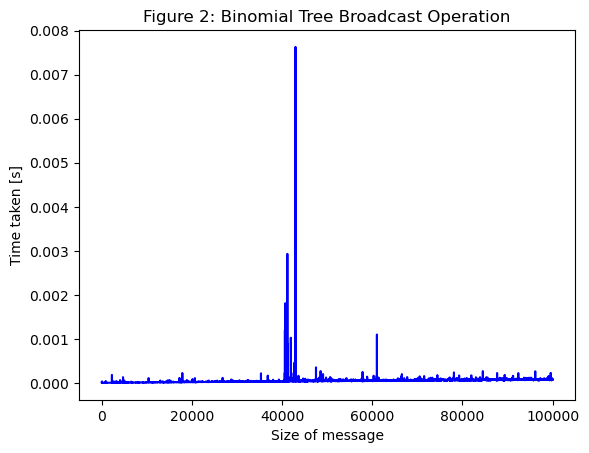

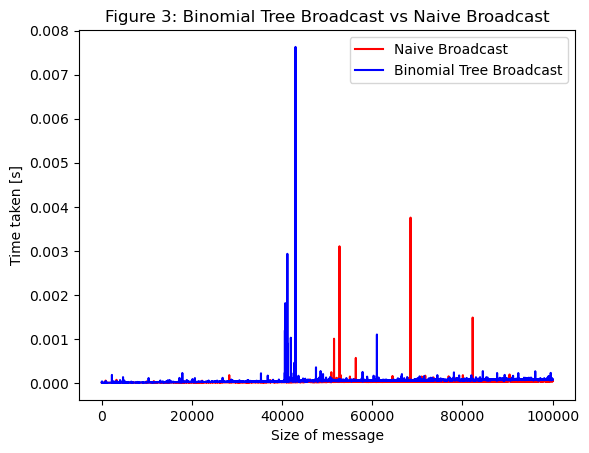

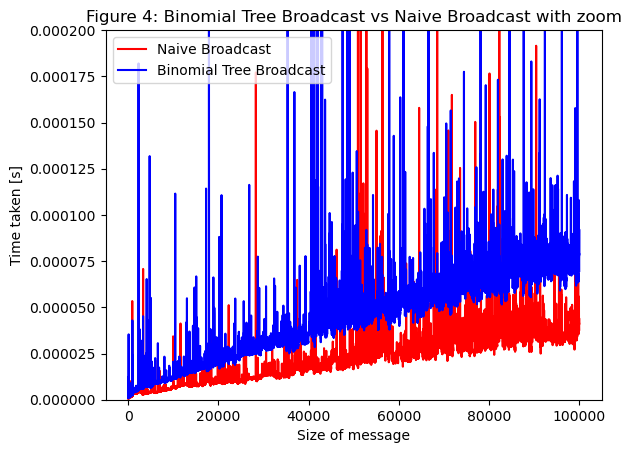

In [7]:
# Path to the CSV file
csv_file_2 = 'broadcast_times_exercise2.csv'

# Load the CSV file using numpy
data_2 = np.loadtxt(csv_file_2, delimiter=',', skiprows=1)

# Extract the columns from the data
NumberOfPoints_2 = data_2[:, 0]
Time_2 = data_2[:, 1]

# Plot the data
plt.plot(NumberOfPoints_2, Time_2, color='b')
plt.xlabel('Size of message')
plt.ylabel('Time taken [s]')
plt.title('Figure 2: Binomial Tree Broadcast Operation')
plt.show()

plt.plot(NumberOfPoints_1, Time_1, color='r', label='Naive Broadcast')
plt.plot(NumberOfPoints_2, Time_2, color='b', label='Binomial Tree Broadcast')
plt.xlabel('Size of message')
plt.ylabel('Time taken [s]')
plt.title('Figure 3: Binomial Tree Broadcast vs Naive Broadcast')
plt.legend()
plt.show()

plt.plot(NumberOfPoints_1, Time_1, color='r', label='Naive Broadcast')
plt.plot(NumberOfPoints_2, Time_2, color='b', label='Binomial Tree Broadcast')
plt.xlabel('Size of message')
plt.ylabel('Time taken [s]')
plt.ylim(0, 0.0002)
plt.title('Figure 4: Binomial Tree Broadcast vs Naive Broadcast with zoom')
plt.legend()
plt.show()

### Exercise 3

Here we want to show how to use prefix-sums to compute $x_i=a_i * x_{i-1}+b_i$ with $x_0 = a_0$ for given sequences $a_i, b_i$.

This expression can be divided in two parts:

    I) $A[i]=a_i*A[i-1] +b_i$ 
    
    II) $B[i]=a_i*b_{i-1}$
    
Note that the original expression can be rewritten as: $x_{i}=a_{i}*(a_{i-1}*x_{i-2}+b_{i-1})+b_i$

Regarding the first part, a prefix sum can be used the scheme presented in Figure 5. Here, we would initialize the array to the value of $a_0$ and computing $A[i] = a_i * A[i-1] + b_i * B[i-1]$ parallely with the prefix-sum scheme. The same can be applied for the second part (initializing with $b_1$ though).

Finally, after computing both these prefix-sums, a last prefix-sum can be used to calculate $X[i]=A[i]+B[i]=a_i*x_{i-1}+b_i$.

### Figure 5: Parallel Prefix Sum 

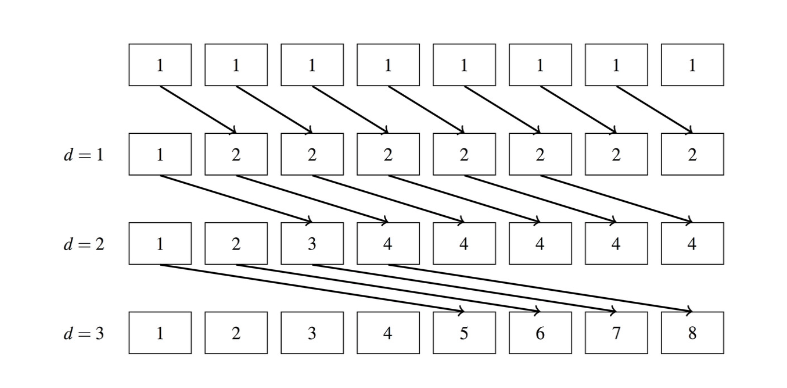

###### Stolen from your slides :)

### Exercise 4

Here we are given an array $A[1...n]$ of boolean elements. The task is to find the first 1 in the array with a $O(n/log n)$ processor ExclusiveReadExclusiveWrite PRAM algorithm that runs in $O(log n)$.

A naive approach would be to read the array from start to finish, giving each processor with index $p$ the array elements with index $i = p mod P$ where $P$ is the total number of processors. Assuming that the processors run on synchrony, we would only need to say that in case multiple processors throw a flag (i.e. they found a 1), the processor with the lowest rank would be prioritized. This processor would output the index of the first 1.

The priorization of the lowest rank can also be accomplished by running processor $p+1$ with a small delay in respect to the processor $p$.

Since we have $n$ array elements and $O(n/log n)$ processors, the running time is $O(n * (\frac{n}{\log {n}})^{-1})=O(\log{n})$.


### Exercise 5

Given an array $A[1...n]$ of boolean elements, we want to compute an array $B$ such that $B[i]$ contains the i'th non-zero element of A. The task is to show that it can be done using a $O(n/log n)$ processor EREW PRAM algorithm that runs in $O(log n)$ time.

Similarly to Exercise 4, we can go through the array $A$ with each processor reading the array elements with index $i = p mod P$ where $P$ is the total number of processors. 

Since we are working in shared memory (afaik, at least), we can keep a global variable $k$ that is going to tell each processor at which index of B we are at. $k$ is initialized to 0 (or 1, depending on how we call the first index of the array). After each round round, the processor with the lowest rank will write to $B[k]$ if it finds a non-zero element and add 1 to $k$.

We can also repeat the same idea as before of running the processor $p+1$ a little delayed with repect to the processor $p$ to avoid collisions and having to check whether or another processor has to write.

Since we have $n$ array elements and $O(n/log n)$ processors, the running time is $O(n * (\frac{n}{\log {n}})^{-1})=O(\log{n})$.